<a href="https://www.kaggle.com/code/sachinbulchandani/multiclassclassification?scriptVersionId=162110614" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Multiclass Classification

## Understanding the Attributes

* **id** : record on the data
* **age** : age of the subject
* **Gender** : Gender of the subject
* **Height** : Height of the subjcet
* **Weight** : Weight of the subject
* **family_history_with_overweight** : (YES/NO) family history of the subject
* **FAVC** : (YES/NO) Frequenct Consumption of high Calorific Food
* **FCVC** : Frequency of Consumption of Vegetables
* **NCP** : Number of main meals.
* **CAEC** : Consumption of food between meals.
* **SMOKE** : (YES/NO) Does subject SMOKE or not.
* **CH2O** : Consumption of water daily.
* **SCC** : (YES/NO) Calories consumption monitoring
* **FAF** : Physical activity frequency
* **TUE** : Time using technology devices
* **CALC** : Consumption of Alcohol
* **MTRANS** : Mode of transportation
* **NObeysdad** : target variable 
    - **Underweight** : Less than 18.5
    - **Normal** : 18.5 to 24.9
    - **Overweight** : 25.0 to 29.9
    - **Obesity I** : 30.0 to 34.9
    - **Obesity II** : 35.0 to 39.9
    - **Obesity III** : Higher than 40


In [1]:
# Importing the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Lodding the data
train = pd.read_csv(r"/kaggle/input/playground-series-s4e2/train.csv")
test = pd.read_csv(r"/kaggle/input/playground-series-s4e2/test.csv")

In [3]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
test.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

Looks like no missing values are present

In [6]:
# checking for dupilcates
print(f"No. of duplicates in train set: {train.duplicated().sum()}  \
       No. of duplicates in test set: {test.duplicated().sum()}")

No. of duplicates in train set: 0         No. of duplicates in test set: 0


In [7]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


* Age looks little skewed and have some outliers on the right tail, we will check that

In [8]:
skewness = (
    train.select_dtypes("number")
    .skew()
    .reset_index()
    .rename(columns={"index": "variable", 0: "skewness"})
)
skewness_test = (
    test.select_dtypes("number")
    .skew()
    .reset_index()
    .rename(columns={"index": "variable", 0: "skewness_test"})
)
kurtosis = (
    train.select_dtypes("number")
    .kurtosis()
    .reset_index()
    .rename(columns={"index": "variable", 0: "kurtosis"})
)
kurtosis_test = (
    test.select_dtypes("number")
    .kurtosis()
    .reset_index()
    .rename(columns={"index": "variable", 0: "kurtosis_test"})
)
skewness_kurtosis = pd.concat([skewness, kurtosis["kurtosis"], skewness_test["skewness_test"], kurtosis_test['kurtosis_test']], axis=1)
skewness_kurtosis.round(2).style.format(precision=2).background_gradient(
    vmax=3, vmin=-1, cmap="Greys"
)

,variable,skewness,kurtosis,skewness_test,kurtosis_test
0,id,0.00,-1.20,0.00,-1.20
1,Age,1.59,3.70,1.57,3.54
2,Height,0.02,-0.56,0.06,-0.54
3,Weight,0.09,-1.00,0.09,-1.01
4,FCVC,-0.36,-0.89,-0.34,-0.89
5,NCP,-1.56,1.84,-1.54,1.70
6,CH2O,-0.21,-0.74,-0.20,-0.76
7,FAF,0.51,-0.49,0.53,-0.47
8,TUE,0.67,-0.42,0.70,-0.41


- Test set and train set are perfectly sampled
- Age and NCP are skewed

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

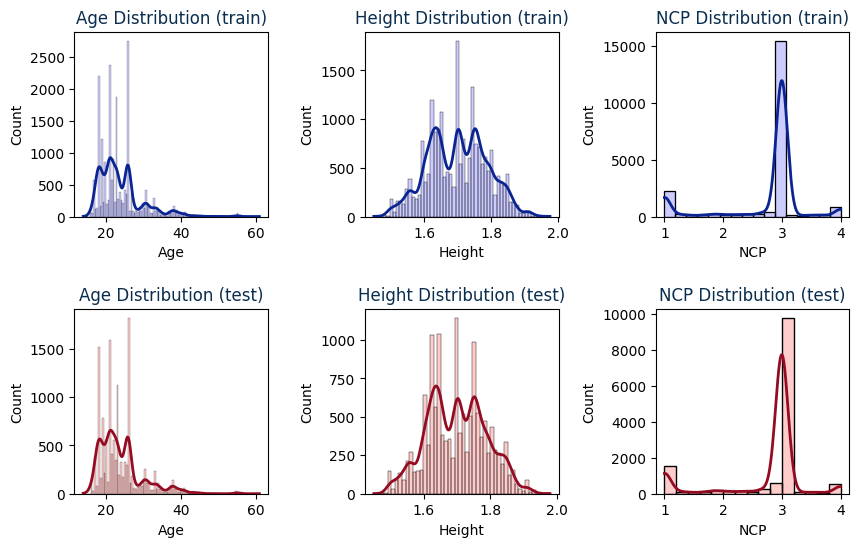

In [9]:
# plotting the distrubution plot and visualizing
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
ax1 = sns.histplot(data=train, x = "Age", kde = True, alpha = 0.2, color = "Blue", line_kws = {"linewidth": 2.0}, ax = axs[0, 0])
ax2 = sns.histplot(data=train, x = "Height", kde = True, alpha = 0.2, color = "Blue", line_kws = {"linewidth": 2.0}, ax = axs[0, 1])
ax3 = sns.histplot(data=train, x = "NCP", kde = True, alpha = 0.2, color = "Blue", line_kws = {"linewidth": 2.0}, ax = axs[0, 2])
ax4 = sns.histplot(data=test, x = "Age", kde = True, alpha = 0.2, color = "Red", line_kws = {"linewidth": 2.0}, ax = axs[1, 0])
ax5 = sns.histplot(data=test, x = "Height", kde = True, alpha = 0.2, color = "Red", line_kws = {"linewidth": 2.0}, ax = axs[1, 1])
ax6 = sns.histplot(data=test, x = "NCP", kde = True, alpha = 0.2, color = "Red", line_kws = {"linewidth": 2.0}, ax = axs[1, 2])
ax1.set_title("Age Distribution (train)", fontsize=12, color="#0a2e4f")
ax2.set_title("Height Distribution (train)", fontsize=12, color="#0a2e4f")
ax3.set_title("NCP Distribution (train)", fontsize=12, color="#0a2e4f")
ax4.set_title("Age Distribution (test)", fontsize=12, color="#0a2e4f")
ax5.set_title("Height Distribution (test)", fontsize=12, color="#0a2e4f")
ax6.set_title("NCP Distribution (test)", fontsize=12, color="#0a2e4f")
ax1.lines[0].set_color("#0b2494")
ax2.lines[0].set_color("#0b2494")
ax3.lines[0].set_color("#0b2494")
ax4.lines[0].set_color("#940b22")
ax5.lines[0].set_color("#940b22")
ax6.lines[0].set_color("#940b22")
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

- This proofs that train set and test set are perfectly sampled
- Age is ranges between 14 - 62, and most values appering between 19 and 25.
- NCP ranges between 1 and 4, and is clusterd between 2.5 and 

In [10]:
# Gender distribution
train['Gender'].value_counts(normalize=True)

Gender
Female    0.502071
Male      0.497929
Name: proportion, dtype: float64

In [11]:
# Gender distribution
test['Gender'].value_counts(normalize=True)

Gender
Female    0.503251
Male      0.496749
Name: proportion, dtype: float64

Samples is evenly distributed among the Male and Female

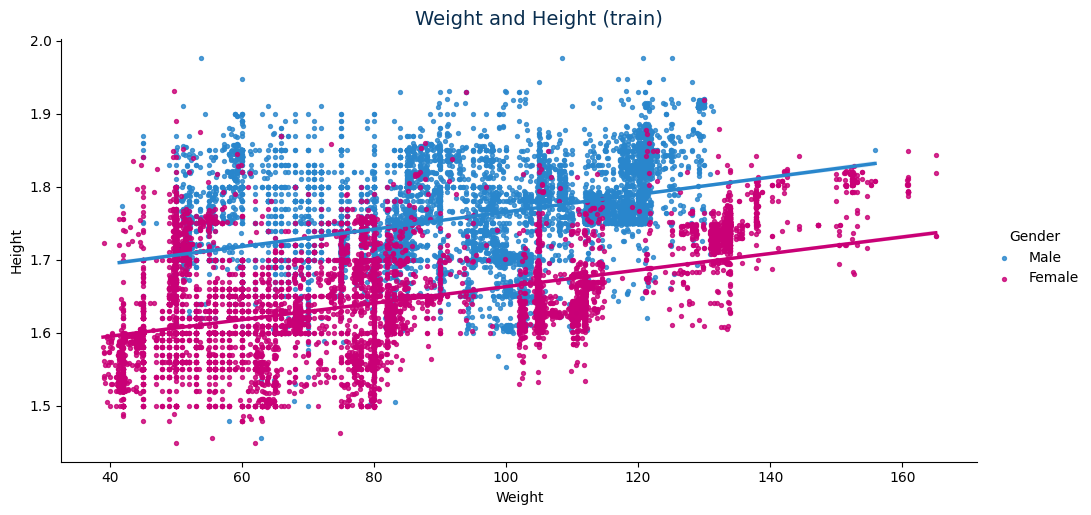

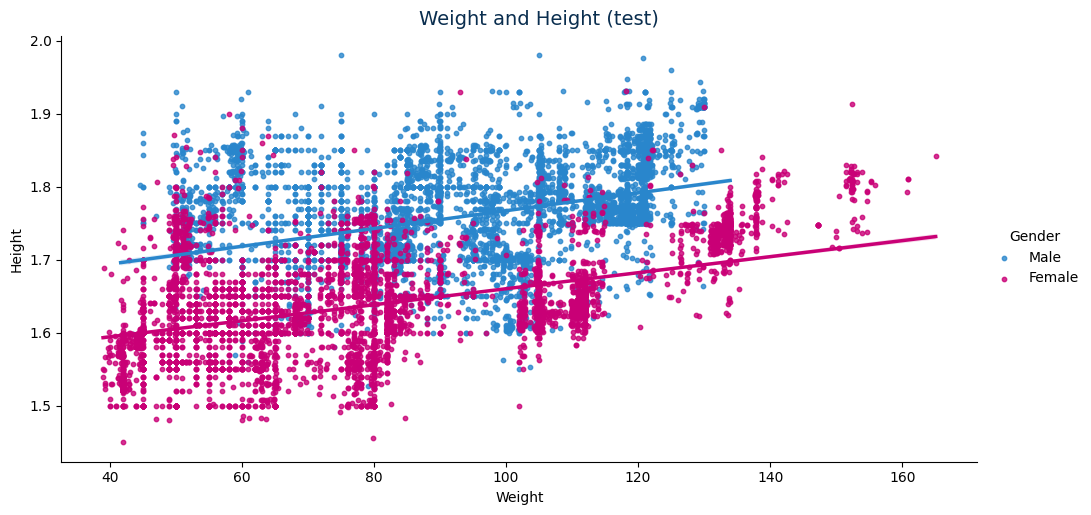

In [12]:
lm_plot_train = sns.lmplot(data=train, x="Weight", y="Height", hue="Gender", height=5, 
                           aspect = 2, palette={"Female": "#c90076", "Male": "#2986cc"},
                           scatter_kws={"s": 8}, line_kws={"linewidth": 2.5})

lm_plot_train.set_axis_labels("Weight", "Height")
lm_plot_train.fig.suptitle("Weight and Height (train)", y=1.02, fontsize=14, color="#0a2e4f")

lm_plot_test = sns.lmplot(data=test, x="Weight", y="Height", hue="Gender", height=5, 
                          aspect = 2, palette={"Female": "#c90076", "Male": "#2986cc"},
                          scatter_kws={"s": 10}, line_kws={"linewidth": 2.5})

lm_plot_test.set_axis_labels("Weight", "Height")
lm_plot_test.fig.suptitle("Weight and Height (test)", y=1.02, fontsize=14, color="#0a2e4f")

plt.show()

- This looks normal as the avg height of male is more that female and this tred depicts that

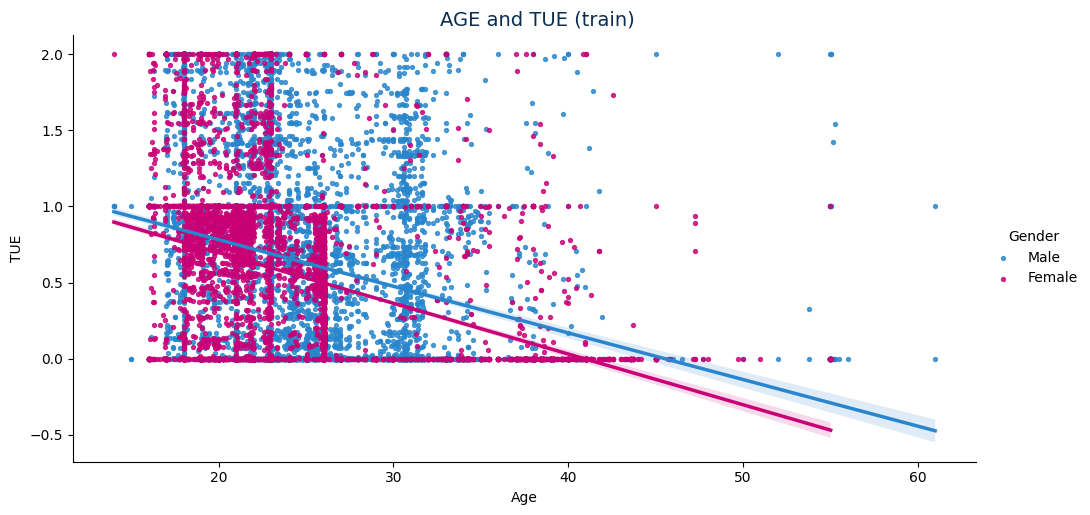

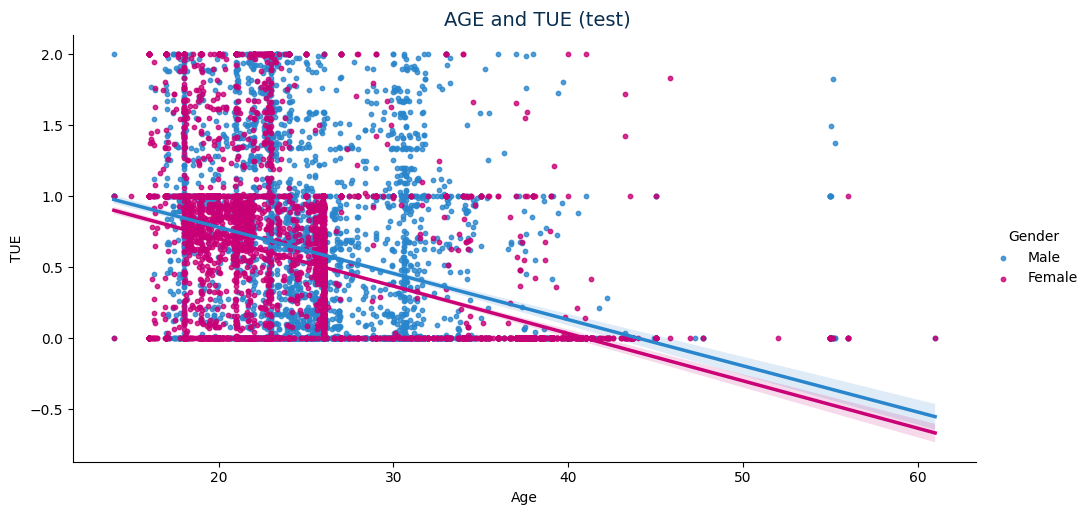

In [13]:
lm_plot_train = sns.lmplot(data=train, x="Age", y="TUE", hue="Gender", height=5, 
                           aspect = 2, palette={"Female": "#c90076", "Male": "#2986cc"},
                           scatter_kws={"s": 8}, line_kws={"linewidth": 2.5})

lm_plot_train.set_axis_labels("Age", "TUE")
lm_plot_train.fig.suptitle("AGE and TUE (train)", y=1.02, fontsize=14, color="#0a2e4f")

lm_plot_test = sns.lmplot(data=test, x="Age", y="TUE", hue="Gender", height=5, 
                          aspect = 2, palette={"Female": "#c90076", "Male": "#2986cc"},
                          scatter_kws={"s": 10}, line_kws={"linewidth": 2.5})

lm_plot_test.set_axis_labels("Age", "TUE")
lm_plot_test.fig.suptitle("AGE and TUE (test)", y=1.02, fontsize=14, color="#0a2e4f")

plt.show()

- As expected the older people doesn't use as much of the electronic devices

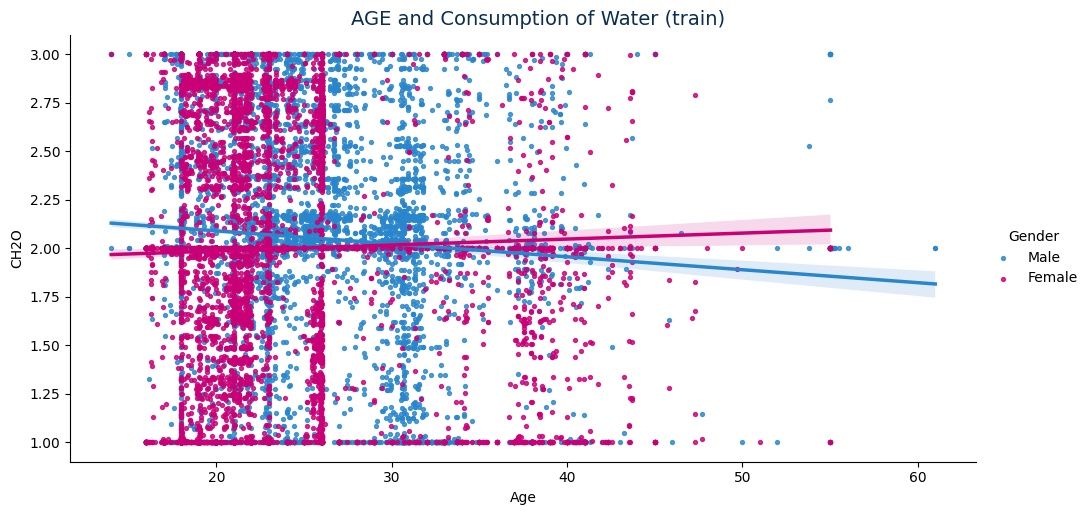

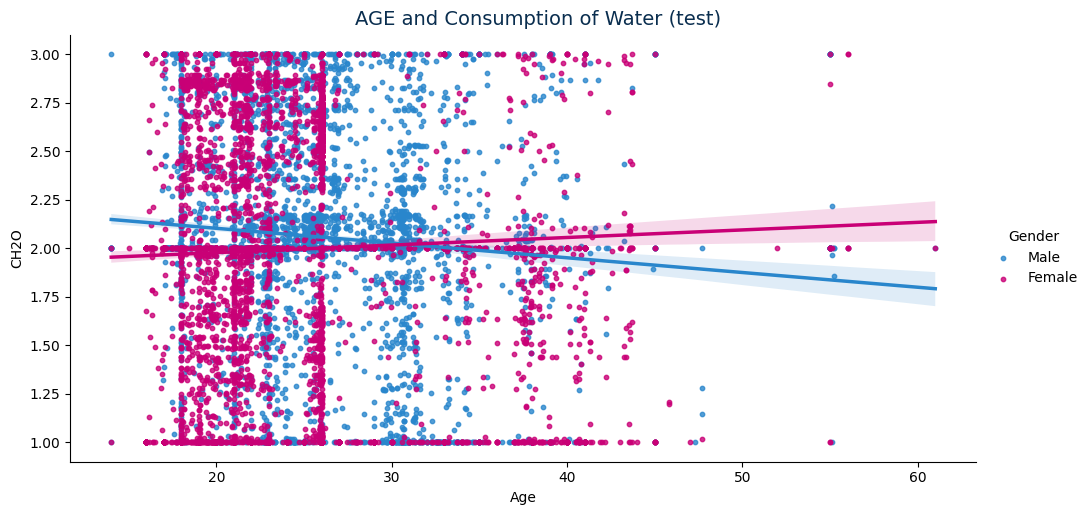

In [14]:
lm_plot_train = sns.lmplot(data=train, x="Age", y="CH2O", hue="Gender", height=5, 
                           aspect = 2, palette={"Female": "#c90076", "Male": "#2986cc"},
                           scatter_kws={"s": 8}, line_kws={"linewidth": 2.5})

lm_plot_train.set_axis_labels("Age", "CH2O")
lm_plot_train.fig.suptitle("AGE and Consumption of Water (train)", y=1.02, fontsize=14, color="#0a2e4f")

lm_plot_test = sns.lmplot(data=test, x="Age", y="CH2O", hue="Gender", height=5, 
                          aspect = 2, palette={"Female": "#c90076", "Male": "#2986cc"},
                          scatter_kws={"s": 10}, line_kws={"linewidth": 2.5})

lm_plot_test.set_axis_labels("Age", "CH2O")
lm_plot_test.fig.suptitle("AGE and Consumption of Water (test)", y=1.02, fontsize=14, color="#0a2e4f")

plt.show()

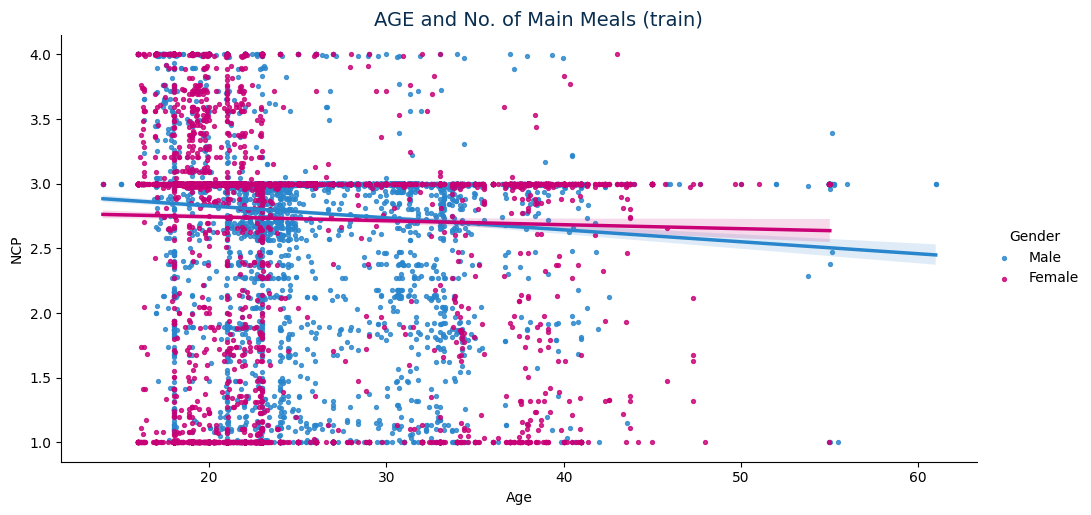

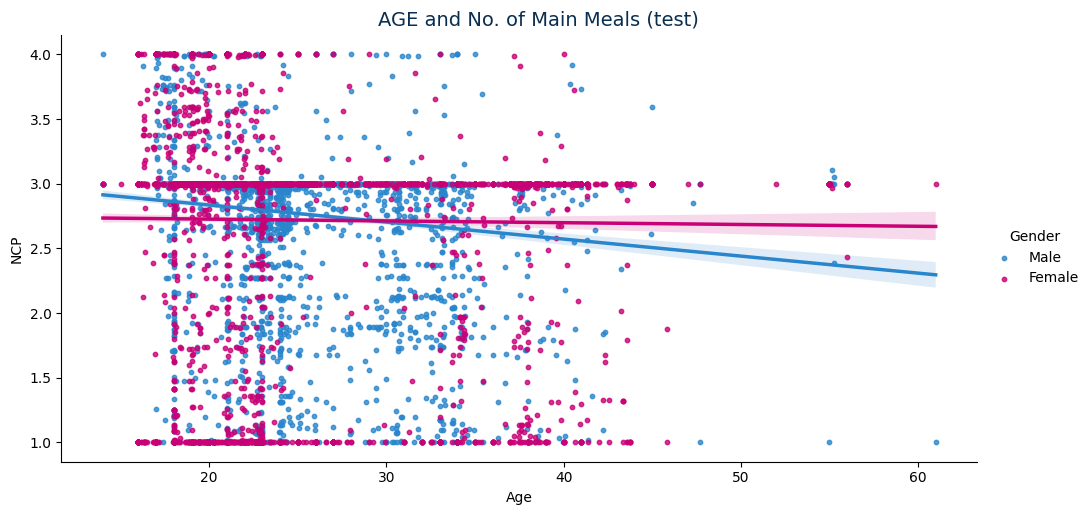

In [15]:
lm_plot_train = sns.lmplot(data=train, x="Age", y="NCP", hue="Gender", height=5, 
                           aspect = 2, palette={"Female": "#c90076", "Male": "#2986cc"},
                           scatter_kws={"s": 8}, line_kws={"linewidth": 2.5})

lm_plot_train.set_axis_labels("Age", "NCP")
lm_plot_train.fig.suptitle("AGE and No. of Main Meals (train)", y=1.02, fontsize=14, color="#0a2e4f")

lm_plot_test = sns.lmplot(data=test, x="Age", y="NCP", hue="Gender", height=5, 
                          aspect = 2, palette={"Female": "#c90076", "Male": "#2986cc"},
                          scatter_kws={"s": 10}, line_kws={"linewidth": 2.5})

lm_plot_test.set_axis_labels("Age", "NCP")
lm_plot_test.fig.suptitle("AGE and No. of Main Meals (test)", y=1.02, fontsize=14, color="#0a2e4f")

plt.show()

- For Females no. of meals per day remains stable over their age, while for males it slightly declines

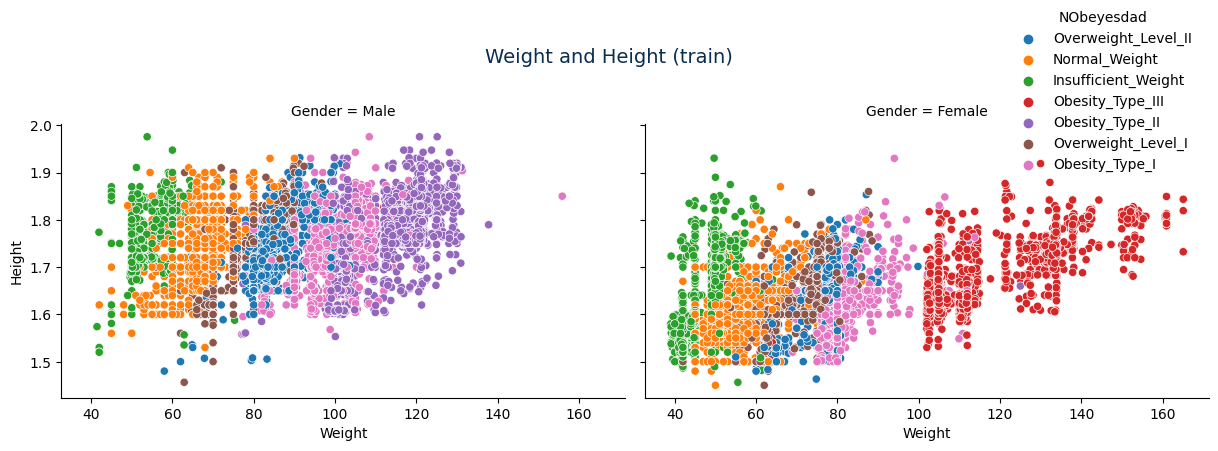

In [16]:
lm_plot_train = sns.relplot(data=train, x="Weight", y="Height", hue="NObeyesdad", height=4, 
                           aspect = 1.3, col = 'Gender')

lm_plot_train.set_axis_labels("Weight", "Height")
lm_plot_train.fig.suptitle("Weight and Height (train)", y=1.02, fontsize=14, color="#0a2e4f")

lm_plot_train._legend.set_bbox_to_anchor([0.98, 0.9])

plt.tight_layout()

plt.show()

- Intresting, we don't have **Obesity_Type_III** in males, and **Obesity_Type_II** in Females.

In [17]:
train[train['NObeyesdad'] == 'Obesity_Type_III']['Gender'].value_counts()

Gender
Female    4041
Male         5
Name: count, dtype: int64

In [18]:
train[train['NObeyesdad'] == 'Obesity_Type_II']['Gender'].value_counts()

Gender
Male      3240
Female       8
Name: count, dtype: int64

In [19]:
train['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

This can be used to increase the accuracy if need!

In [20]:
train['NObeyesdad'].value_counts(normalize=True)

NObeyesdad
Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: proportion, dtype: float64

- Traget variable is somewhat balanced

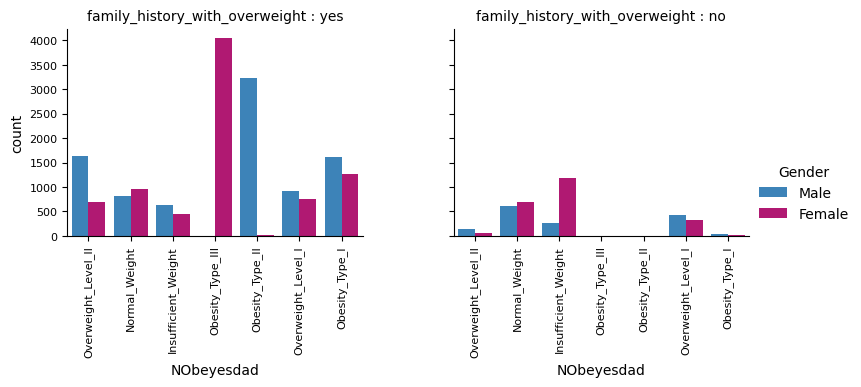

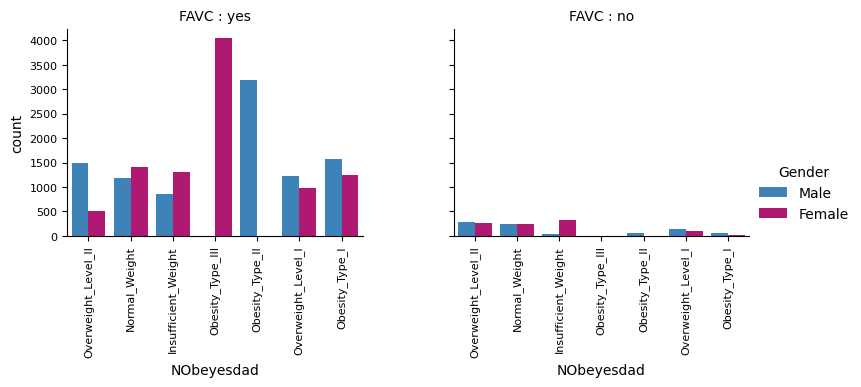

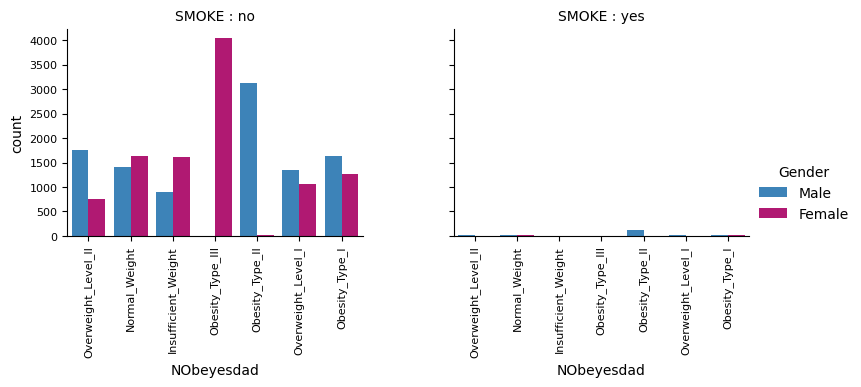

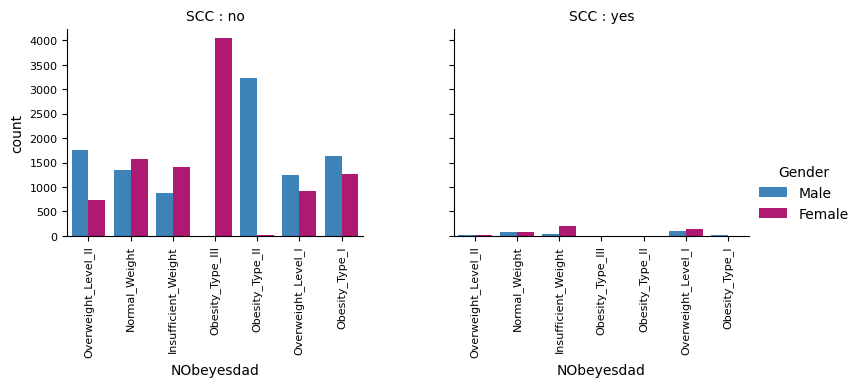

In [21]:
target = 'NObeyesdad'
for i in train.select_dtypes(include='object').columns.tolist():
    if i == target or i == 'Gender' or train[i].nunique() != 2:
        pass
    else:
        g = sns.catplot(x=target, data=train, col = i, height = 3, aspect=1.3, hue = 'Gender', palette={"Female": "#c90076", "Male": "#2986cc"}, kind='count')
        g.set_titles(col_template = "{col_var} : {col_name}")
        g.set_xticklabels(rotation=90)
        g.tick_params(labelsize=8)

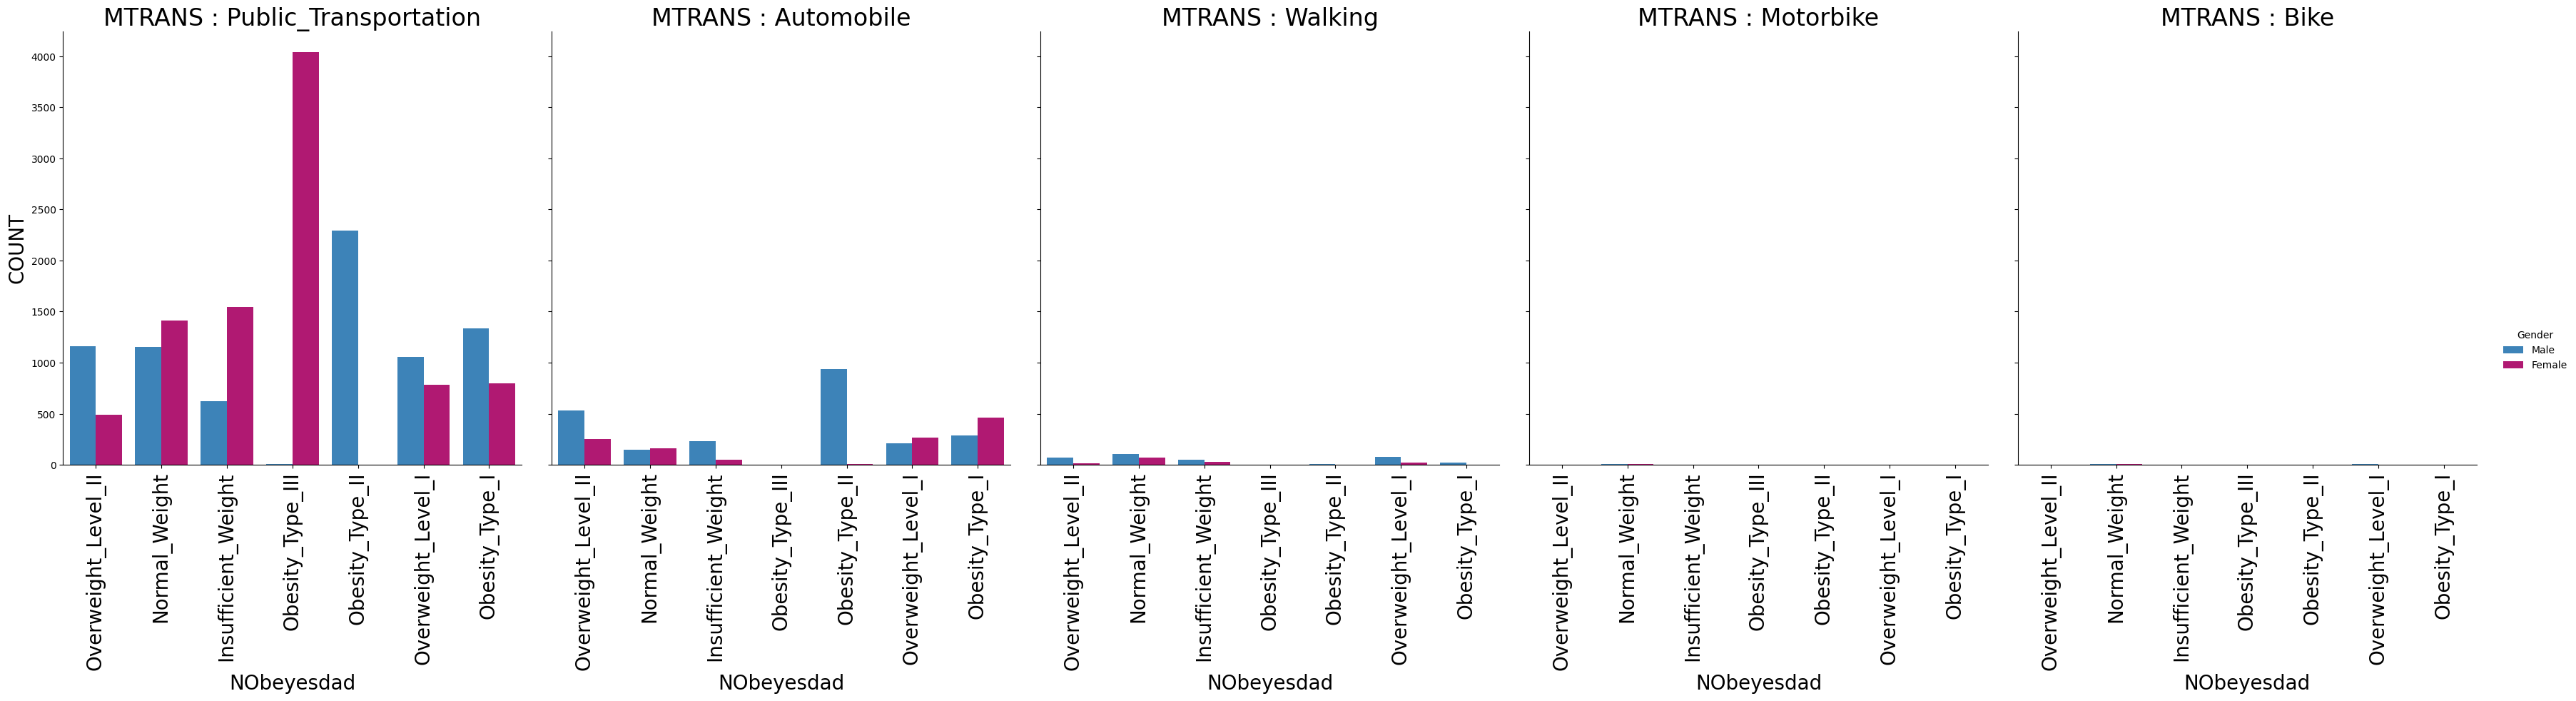

In [22]:
g = sns.catplot(x='NObeyesdad', hue = 'Gender', col = 'MTRANS', height=7, aspect = 1, kind='count', data = train, palette={"Female": "#c90076", "Male": "#2986cc"})
g.set_xticklabels(rotation=90, fontsize=20)
g.set_axis_labels('NObeyesdad', 'COUNT', fontsize = 20)
g.set_titles(col_template="{col_var} : {col_name}", size = 24)
plt.show()

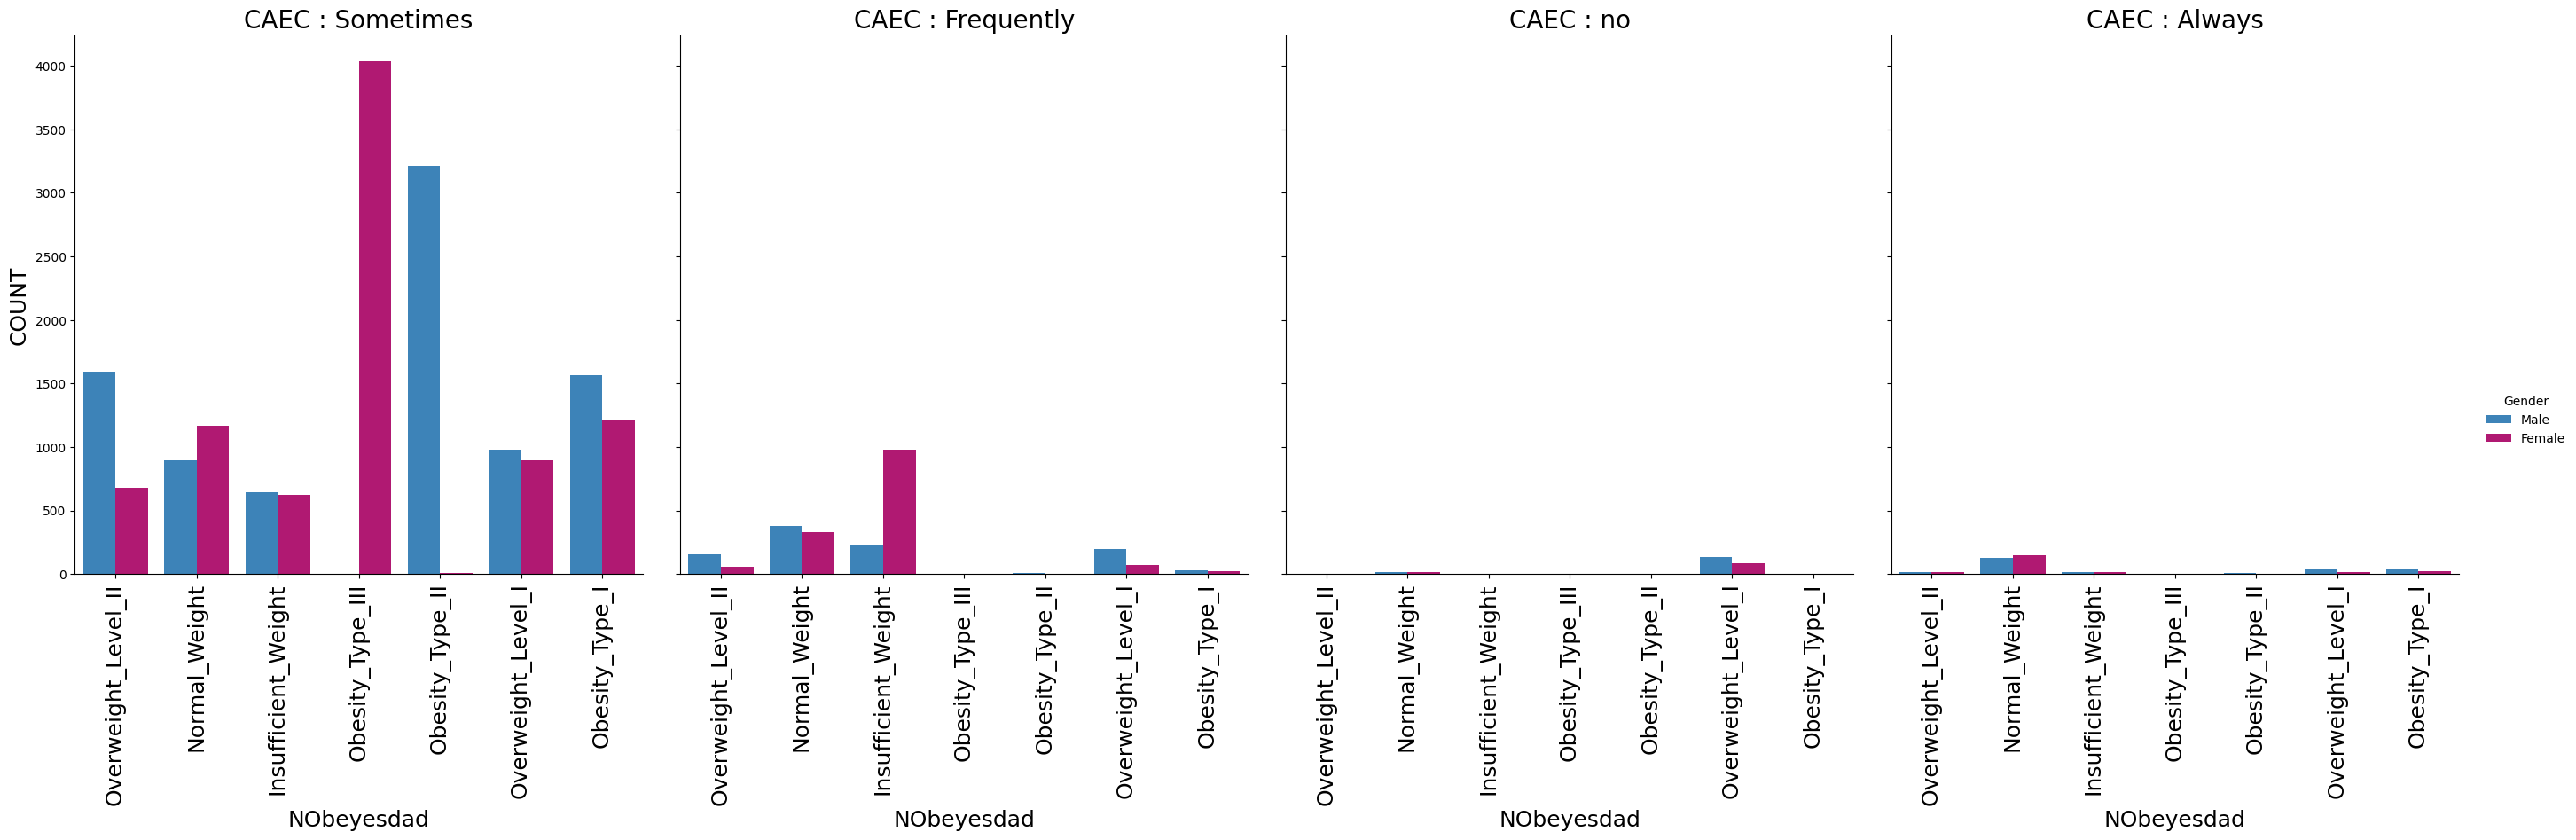

In [23]:
g = sns.catplot(x='NObeyesdad', hue = 'Gender', col = 'CAEC', height=7, aspect = 1, kind='count', data = train, palette={"Female": "#c90076", "Male": "#2986cc"})
g.set_xticklabels(rotation=90, fontsize=18)
g.set_axis_labels('NObeyesdad', 'COUNT', fontsize = 18)
g.set_titles(col_template="{col_var} : {col_name}", size = 20)
plt.show()

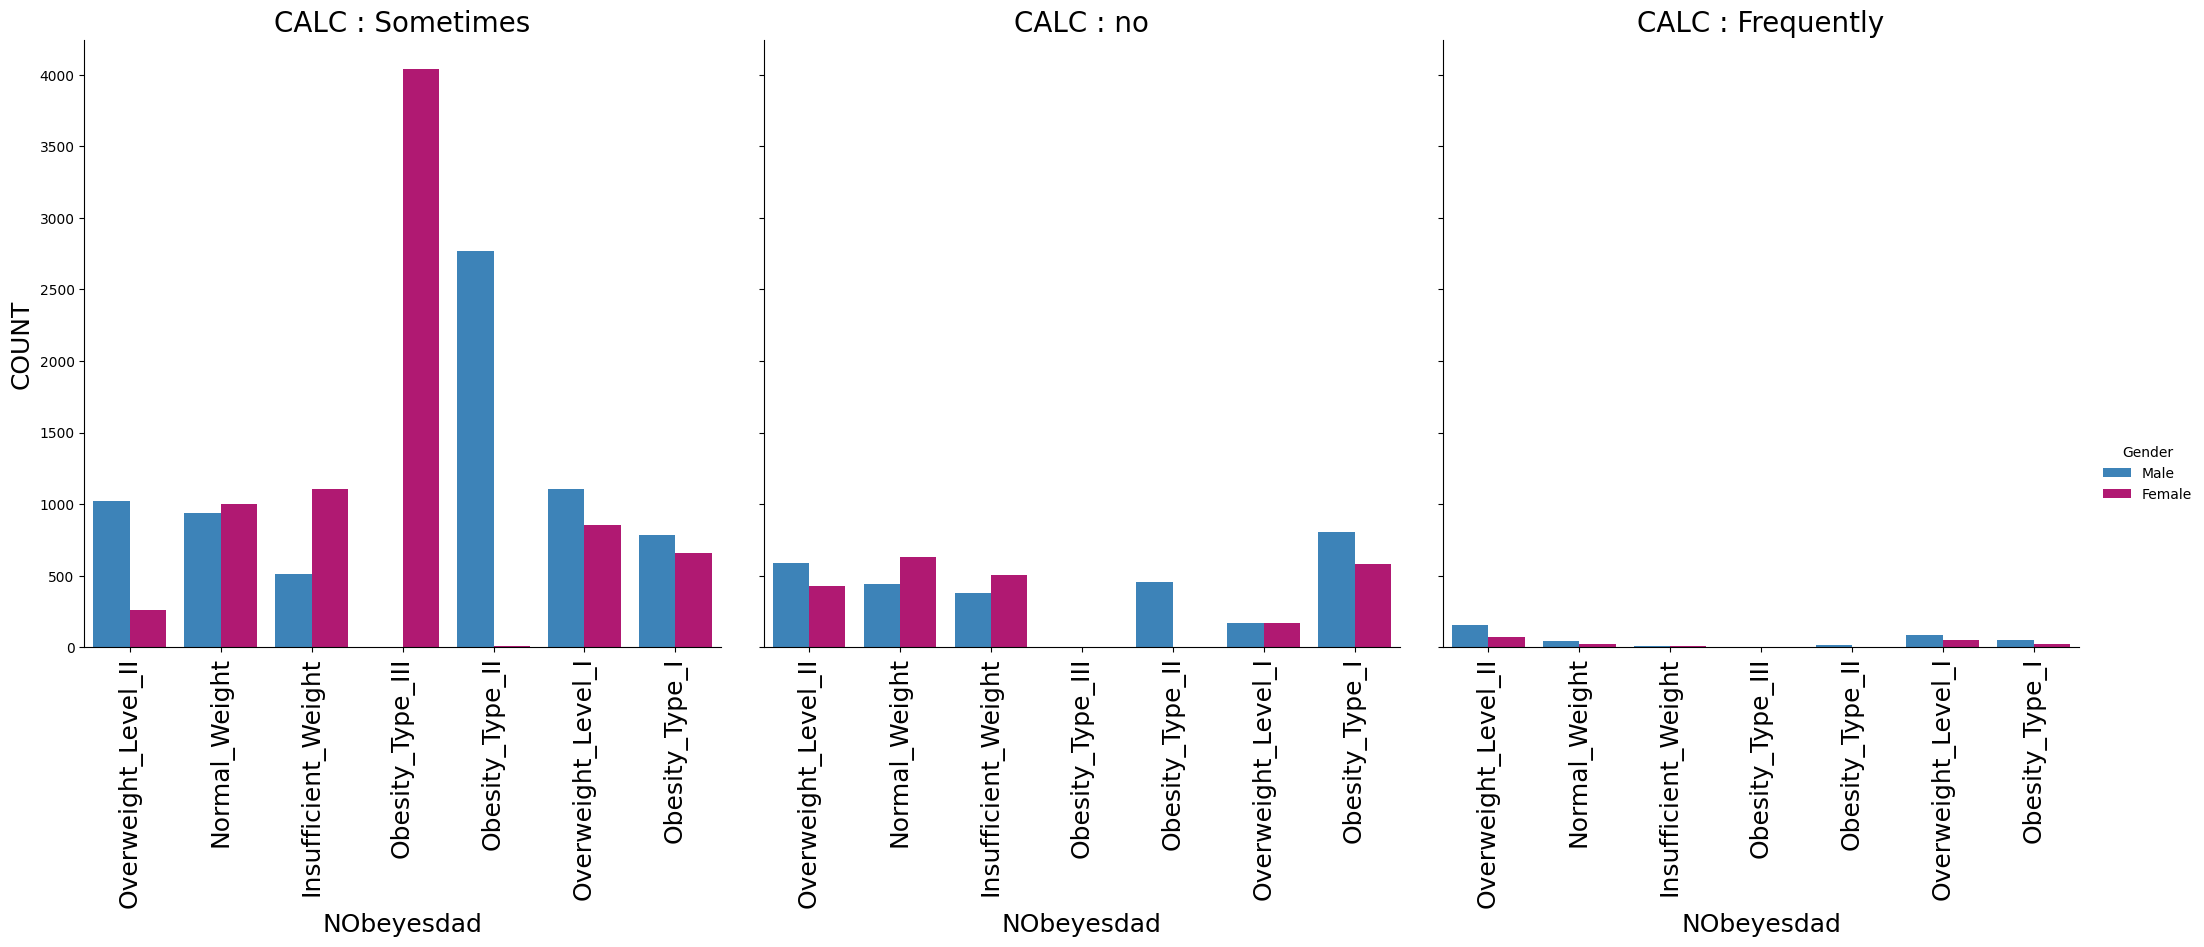

In [24]:
g = sns.catplot(x='NObeyesdad', hue = 'Gender', col = 'CALC', height=7, aspect = 1, kind='count', data = train, palette={"Female": "#c90076", "Male": "#2986cc"})
g.set_xticklabels(rotation=90, fontsize=18)
g.set_axis_labels('NObeyesdad', 'COUNT', fontsize = 18)
g.set_titles(col_template="{col_var} : {col_name}", size = 20)
plt.show()

In [25]:
train['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64

In [26]:
train[train['family_history_with_overweight'] == 'no']['NObeyesdad'].value_counts()

NObeyesdad
Insufficient_Weight    1449
Normal_Weight          1292
Overweight_Level_I      756
Overweight_Level_II     193
Obesity_Type_I           48
Obesity_Type_II           5
Obesity_Type_III          1
Name: count, dtype: int64

### **Points to be noted!!!**
- In the training set, only Females are classified as Obesity_Type_III (5:4041)
- Similarly, only Males are classified as Obesity_Type_II (3240:8)
- When Family_history_with_overweight is False, we have only (54 : 3744) classifing any of the three obesity types.  
`We can use these points in increasing the accuracy of the model, I know this is not machine learning so we will use them only incase we need them.`

In [27]:
print(f"Training : {train['CALC'].value_counts()} \n Test : {test['CALC'].value_counts()}")

Training : CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64 
 Test : CALC
Sometimes     9979
no            3513
Frequently     346
Always           2
Name: count, dtype: int64


Okay so we have one extra category as **Always** in test set changing that to **Frequently**, as there are only two entries.

In [28]:
print(f"Training : {train['CAEC'].value_counts()} \n Test : {test['CAEC'].value_counts()}")

Training : CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64 
 Test : CAEC
Sometimes     11689
Frequently     1617
Always          359
no              175
Name: count, dtype: int64


In [29]:
test.loc[test['CALC'] == 'Always', 'CALC'] = 'Frequently'

In [30]:
print(f"Training : {train['CALC'].value_counts()} \n Test : {test['CALC'].value_counts()}")

Training : CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64 
 Test : CALC
Sometimes     9979
no            3513
Frequently     348
Name: count, dtype: int64


## Modeling

In [31]:
# Improting the required Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Removing the uneccessary features:
X = train.copy()
X_test = test.copy()
X.drop(columns=['id'], inplace=True)
X_test.drop(columns=['id'], inplace=True)

# Label Encoding Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, NObeyesdad (target)
# OneHotEncoding for the MTRANS column (as there is no relation between those categories in MTRANS)
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()
for col in X.select_dtypes(include='object').columns:
    if col != 'MTRANS':
        X[col] = label_encoder.fit_transform(X[col])
        if col != 'NObeyesdad':
            X_test[col] = label_encoder.transform(X_test[col])
    else:
        # Reshaping the data into 2D-array to pass it to OneHotEncoder
        data_reshaped_train = X[col].values.reshape(-1, 1)
        data_reshaped_test = X_test[col].values.reshape(-1, 1)
        
        onehot_encoded_train = onehot_encoder.fit_transform(data_reshaped_train).toarray()
        onehot_encoded_test = onehot_encoder.transform(data_reshaped_test).toarray()
        
        column_names = [f"{col}_{category}" for category in onehot_encoder.categories_[0]]
        
        # Generating the dataFrame from the encoded vectors
        onehot_df_train = pd.DataFrame(onehot_encoded_train, columns=column_names)
        onehot_df_test = pd.DataFrame(onehot_encoded_test, columns=column_names)
        
        # Combining the two dataFarames and droping the original unencoded attribute
        X = pd.concat([X, onehot_df_train], axis=1)
        X_test = pd.concat([X_test, onehot_df_test], axis=1)
        X.drop(col, axis=1, inplace=True)
        X_test.drop(col, axis=1, inplace=True)
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,...,0,0.000000,0.976473,1,6,0.0,0.0,0.0,1.0,0.0
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,...,0,1.000000,1.000000,2,1,1.0,0.0,0.0,0.0,0.0
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,...,0,0.866045,1.673584,2,0,0.0,0.0,0.0,1.0,0.0
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,...,0,1.467863,0.780199,1,4,0.0,0.0,0.0,1.0,0.0
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,...,0,1.967973,0.931721,1,6,0.0,0.0,0.0,1.0,0.0


In [32]:
X_test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,2,0,2.825629,0,0.855400,0.000000,1,0.0,0.0,0.0,1.0,0.0
1,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000,0.000000,1,0.0,0.0,0.0,1.0,0.0
2,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,2,0,2.621877,0,0.000000,0.250502,1,0.0,0.0,0.0,1.0,0.0
3,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,2,0,2.786417,0,0.094851,0.000000,1,0.0,0.0,0.0,1.0,0.0
4,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,2,0,2.653531,0,0.000000,0.741069,1,0.0,0.0,0.0,1.0,0.0


In [33]:
label_encoder.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

-  In the label_encoder we have the encodings for target variable we will use it later

In [34]:
X.dtypes

Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
NObeyesdad                          int64
MTRANS_Automobile                 float64
MTRANS_Bike                       float64
MTRANS_Motorbike                  float64
MTRANS_Public_Transportation      float64
MTRANS_Walking                    float64
dtype: object

In [35]:
# Applying Sandard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Collecting the numerical features
X_numerical_train = X[X.select_dtypes(include='float64').columns[:-5]]
X_numerical_test = X_test[X_test.select_dtypes(include='float64').columns[:-5]]

# Dropping the selected columns
X.drop(X_numerical_train.columns, axis = 1, inplace=True)
X_test.drop(X_numerical_test.columns, axis=1, inplace=True)

scaled_features_train = scaler.fit_transform(X_numerical_train)
scaled_features_test = scaler.transform(X_numerical_test)

scaled_df_train = pd.DataFrame(scaled_features_train, columns=X_numerical_train.columns)
scaled_df_test = pd.DataFrame(scaled_features_test, columns=X_numerical_test.columns)

# Concatinating the dataFrames
X = pd.concat([X, scaled_df_train], axis=1)
X_test = pd.concat([X_test, scaled_df_test], axis=1)

X.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,1,6,0.0,0.0,...,1.0,0.0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438
1,0,1,1,1,0,0,2,1,1.0,0.0,...,0.0,0.0,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513
2,0,1,1,2,0,0,2,0,0.0,0.0,...,1.0,0.0,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239
3,0,1,1,2,0,0,1,4,0.0,0.0,...,1.0,0.0,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455
4,1,1,1,2,0,0,1,6,0.0,0.0,...,1.0,0.0,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111


In [36]:
y = X['NObeyesdad']
X = X.drop('NObeyesdad', axis=1)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=.8, random_state=42)

### Model-1: RANDOM Forest

In [38]:
# importing the libraries for the model
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
rfClassifier = RandomForestClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [25, 50, 100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rfClassifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [39]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rfClassifier = grid_search.best_estimator_
test_accuracy = best_rfClassifier.score(X_val, y_val)

print("Test Accuracy with Best Hyperparameters:", test_accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Test Accuracy with Best Hyperparameters: 0.8959537572254336


In [40]:
# Make predictions on the test set
y_pred = best_rfClassifier.predict(X_val)

In [41]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print('Classification Report:\n', classification_report(y_val, y_pred))

Accuracy: 0.8959537572254336
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       524
           1       0.84      0.88      0.86       626
           2       0.89      0.87      0.88       543
           3       0.97      0.98      0.97       657
           4       1.00      1.00      1.00       804
           5       0.77      0.75      0.76       484
           6       0.79      0.80      0.79       514

    accuracy                           0.90      4152
   macro avg       0.89      0.88      0.88      4152
weighted avg       0.90      0.90      0.90      4152



In [42]:
# Submission
y_pred_test = best_rfClassifier.predict(X_test)
y_pred_test = label_encoder.inverse_transform(y_pred_test)
submission_df = pd.DataFrame({'id': test['id'], 'NObeyesdad': y_pred_test})
submission_df.to_csv('submission.csv', index=False)